# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data: load the wine dataset from sklearn, and assign the feature names to a variable called X.

In [9]:
# your code here:
from sklearn import datasets 
wine= datasets.load_wine()
print(wine.keys())
X=pd.DataFrame(wine['data'], columns=wine['feature_names'])
X.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Challenge 1: K-Means

#### 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [101]:
# your code here:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_d= StandardScaler().fit_transform(X)
X_df=pd.DataFrame(X_d, columns=X.columns)
#X_df.head()
X_df1=X_df
X_df1.head()
X_df2=X_df

In [24]:
km=KMeans(n_clusters=8, random_state=100)
kmean=km.fit(X_df)
kmeans=kmean.predict(X_df)
#print(pd.Series(kmeans).value_counts().sort_index())

X_df['cluster']=kmeans
X_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,6
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,6
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,6
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,6
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [39]:
#compute the silhoutte score:
from sklearn.metrics import silhouette_score

no_K=range(2, 9)
silhouette=[]

for k in no_K:
    km=KMeans(n_clusters=k, random_state=100)
    km.fit(X_df)
    silhouette.append(silhouette_score(X_df, km.predict(X_df)))
print(silhouette)
print(silhouette[6])#to print the silouhete score only for k=8


[0.3086856346732238, 0.307170832463426, 0.29694881614808616, 0.31068458972529794, 0.302651760674832, 0.31591263345450415, 0.26764893066755435]
0.26764893066755435


Text(0.5, 1.0, 'Silhoutte score showing the optimal k')

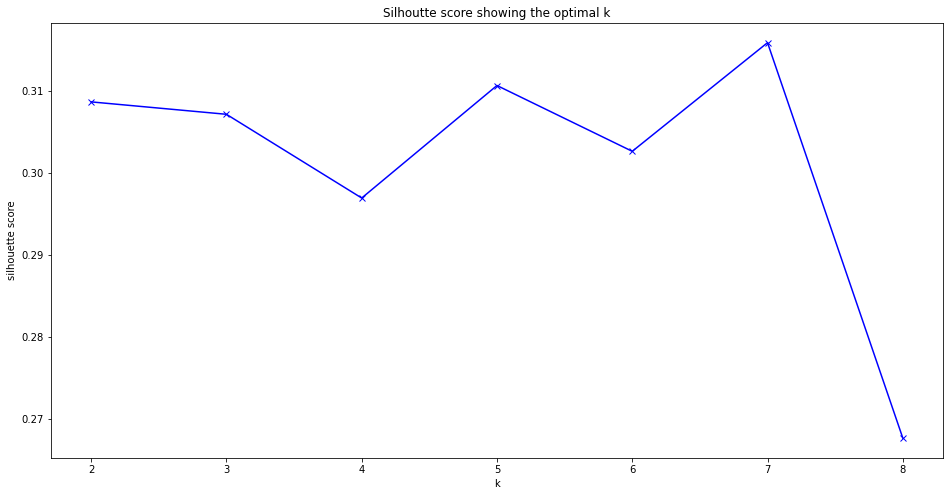

In [46]:
# to visualise the score:

plt.figure(figsize=(16,8))
plt.plot(no_K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(no_K), max(no_K)+1, 1.0)) # ask Cristina
plt.title('Silhoutte score showing the optimal k')


#### 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [51]:
# your code here:


#### 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [50]:
# your code here:
km=KMeans(n_clusters=3, random_state=100)
kmean=km.fit(X_df)
kmeans=kmean.predict(X_df)
#print(pd.Series(kmeans).value_counts().sort_index())

X_df['cluster']=kmeans
X_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


In [52]:
no_K=range(2, 4)
silhouette=[]

for k in no_K:
    km=KMeans(n_clusters=k, random_state=100)
    km.fit(X_df)
    silhouette.append(silhouette_score(X_df, km.predict(X_df)))
print(silhouette)
print('for k=4: ', silhouette[1])#to print the silouhete score only for k=8


[0.291261852324717, 0.31242895089469863]
for k=4:  0.31242895089469863


#### 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

Please do two visualizations: one with inertia, and one with the silhouette score.

Text(0.5, 1.0, 'Silhoutte score showing the optimal k')

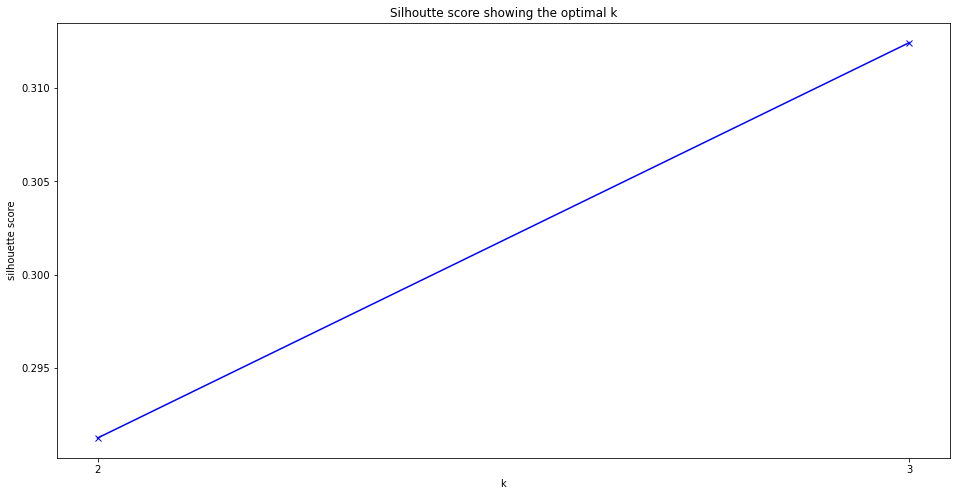

In [53]:
# your code here:
plt.figure(figsize=(16,8))
plt.plot(no_K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(no_K), max(no_K)+1, 1.0)) # ask Cristina
plt.title('Silhoutte score showing the optimal k')

## Challenge 2: Agglomerative Clustering

#### 1. Please fit an AgglomerativeClustering model and compare the results you get to the KMeans results. Plot an elbow curve using the silhouette score.

In [124]:
from sklearn.cluster import AgglomerativeClustering

model= AgglomerativeClustering(n_clusters=8)# the clustering is not random
model1= model.fit_predict(X_df1)# fit & predict should be in one line if code.

X_df1['cluster']=model1
X_df1.head()

silhouette_score(X_df1, model1)# only for one specific K

0.29981322440278085

In [121]:
# silhouette score
no_K1 = range(2, 9)
silhouette = []

for k in no_K1:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X_df1)
    silhouette.append(silhouette_score(X_df1, model.fit_predict(X_df1)))
print(silhouette)
print('silhoette score for k=8: ', silhouette[6])

[0.27297547531135885, 0.30583863042364934, 0.31442886976780426, 0.3146813117862672, 0.31046312758363764, 0.3208385913467395, 0.3150651559481663]
silhoette score for k=8:  0.3150651559481663


#### 2. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [130]:
import seaborn as sns
#help(sns.pairplot)

In [129]:
# use pairplot from seaborn.

## Bonus Challenge: 
#### Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [142]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# svd=Singular Value Decomposition
# PCA is dimensionality reduction 

from sklearn.decomposition import PCA

pca = PCA(n_components=4, svd_solver='full')
pca1=pca.fit(X_df2)
X_df3 = pd.DataFrame(pca1.transform(X_df2))
#X_df3.head()
round(X_df3.corr(), 17) # the correlation is zero in the newly generated features
# beacuse the newly generated features are orthogonal

,0,1,2,3
0,1.000000e+00,5.100000e-16,-7.300000e-16,2.900000e-16
1,5.100000e-16,1.000000e+00,-2.200000e-16,6.000000e-17
2,-7.300000e-16,-2.200000e-16,1.000000e+00,5.000000e-17
3,2.900000e-16,6.000000e-17,5.000000e-17,1.000000e+00


In [143]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)# look up for it

[0.32653384 0.22484998 0.11659481 0.07452457]
[30.8386523  25.59043785 18.42768987 14.73265497]


The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.
